# 목차

* 사전 준비
* 얼굴 및 랜드마크 검출
* 불투명 스티커 적용하기
* 스티커 회전 적용하기
* 다른 사진에 사용해보기
* 회고
* Reference

----------------

루브릭

아래의 기준을 바탕으로 프로젝트를 평가합니다.

평가문항	상세기준
1. 자기만의 카메라앱 기능 구현을 완수하였다.

  > 얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는 데 성공하였다.

2. 스티커 이미지를 정확한 원본 위치에 반영하였다.

  > 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.

3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.

  > 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.

In [119]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


# 사전 준비

In [120]:
# 필요한 패키지 import 하기

import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

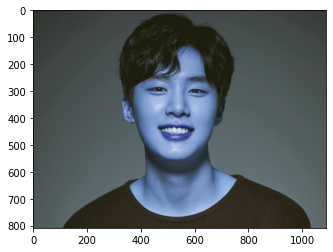

In [121]:
my_image_dir = '/content/drive/MyDrive/아이펠 데이터/camera_sticker' # 이미지가 있는 디렉토리를 가지고 온다.
img_bgr = cv2.imread(my_image_dir + '/face1.jpg')    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

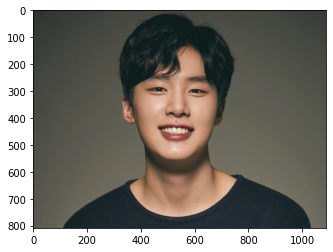

In [122]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [123]:
# 다른 방법을 적용하기 위한 부분

img_bgr = cv2.imread(my_image_dir + '/face1.jpg')    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 얼굴 및 랜드마크 검출

## 얼굴 검출

In [124]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [125]:
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(384, 206) (705, 527)]]


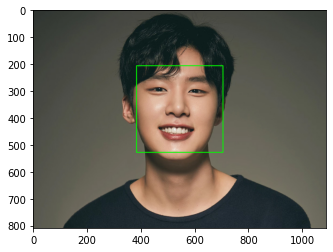

In [126]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 랜드마크 검출

In [127]:
model_path = '/content/drive/MyDrive/아이펠 데이터/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [128]:
# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환합니다.

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


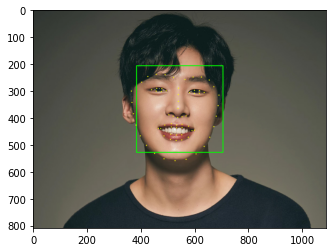

In [129]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

# 불투명 스티커 적용하기

In [130]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코 끝의 index는 33 입니다
    x = landmark[33][0] # 이미지에서 코 부위의 x값
    y = landmark[33][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (438, 200-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(537, 398)
(x,y) : (537,237)
(w,h) : (322,322)


In [131]:
sticker_path = my_image_dir+ '/cat-whiskers.png' # 고양이 수염의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 스티커 이미지의 차원 확인

(322, 322, 3)


In [132]:
refined_x = x - w // 2 
refined_y = y

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -80이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (376,237)
(x,y) : (376,237)


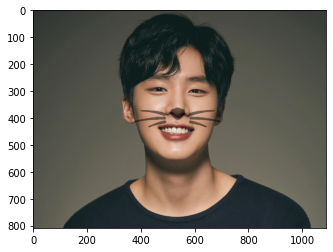

In [133]:
# 스티커 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area,0.5, np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8),0.5,0)
    # cv2.addWeighed() 함수를 통해 50% 의 불투명도를 적용한다.
    
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 스티커 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

# 스티커 회전 적용

In [134]:
sticker_path = my_image_dir+ '/cat-whiskers.png' # 고양이 수염의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 스티커 이미지의 차원 확인

(322, 322, 3)


In [153]:
# 다른 이미지에 적용하기 위한 부분

img_bgr = cv2.imread(my_image_dir + '/face1_45.jpg')    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [154]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [155]:
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

In [156]:
model_path = '/content/drive/MyDrive/아이펠 데이터/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [157]:
# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환합니다.

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


In [158]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코 끝의 index는 33 입니다
    x = landmark[33][0] # 이미지에서 코 부위의 x값
    y = landmark[33][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (438, 200-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(316, 248)
(x,y) : (316,87)
(w,h) : (322,322)


In [159]:
# 스티커가 회전할 각도 설정
# 아크 탄젠트 함수를 사용해 얼굴의 각도를 구한다.

dx, dy = [landmark[33][0] - landmark[27][0], landmark[33][1] - landmark[27][1]]

# 분모가 0이 되는 경우의 예외처리
if dy == 0:
  angle = 0
  
else:
  angle = 180*np.arctan(dx/dy)/np.pi

print(dx,dy,angle)

77 89 40.865328626263576


In [160]:
# 이미지의 크기를 잡고 이미지의 중심을 계산한다.
(h, w) = img_sticker.shape[:2]
(cX, cY) = (w // 2, h // 2)
 
# 이미지의 중심을 기준으로 이미지를 angle 만큼 회전시킨다.
M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)

# borderValue 로 회전하고 남은 빈 공간 색 정해준다.
img_sticker = cv2.warpAffine(img_sticker, M, (w, h),borderValue = (255,255,255))


In [161]:
refined_x = x - w // 2 
refined_y = y

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (155,87)
(x,y) : (155,87)


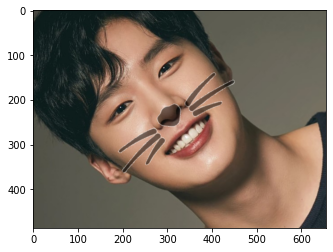

In [162]:
# 스티커 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area,0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8),0.5,0)
    # cv2.addWeighed() 함수를 통해 50% 의 불투명도를 적용한다.
    
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 스티커 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

# 다른 사진에 사용해보기

## 위 과정 함수화

In [167]:
def caticker(name):

  # 다른 이미지에 적용하기 위한 부분
  img_bgr = cv2.imread(my_image_dir + '/' + name)    # OpenCV로 이미지를 불러옵니다
  img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

  # detector를 선언합니다
  detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

  dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

  model_path = '/content/drive/MyDrive/아이펠 데이터/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
  landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

    # landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환합니다.

  list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

  # 얼굴 영역 박스 마다 face landmark를 찾아냅니다
  # face landmark 좌표를 저장해둡니다
  for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

  for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    
    x = landmark[33][0] # 이미지에서 코 부위의 x값
    y = landmark[33][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (438, 200-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)

  sticker_path = my_image_dir+ '/cat-whiskers.png' # 고양이 수염의 경로
  img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
  img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))

  # 스티커가 회전할 각도 설정

  dx, dy = [landmark[33][0] - landmark[27][0], landmark[33][1] - landmark[27][1]]

  if dy == 0:
    angle = 0

  else:
    angle = 180*np.arctan(dx/dy)/np.pi

  # 이미지의 크기를 잡고 이미지의 중심을 계산한다.
  (h, w) = img_sticker.shape[:2]
  (cX, cY) = (w // 2, h // 2)
 
  # 이미지의 중심을 기준으로 이미지를 angle 만큼 회전시킨다.
  M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)

  # borderValue 로 회전하고 남은 빈 공간 색 정해준다.
  img_sticker = cv2.warpAffine(img_sticker, M, (w, h),borderValue = (255,255,255))

  refined_x = x - w // 2 
  refined_y = y

  if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

  if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

  # 스티커 이미지
  sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
  # img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
  img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area,0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8),0.5,0)
    # cv2.addWeighed() 함수를 통해 50% 의 불투명도를 적용한다.
    
  plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 스티커 이미지를 덮어 씌운 이미지가 나오게 된다.
  plt.show()


## 적용!

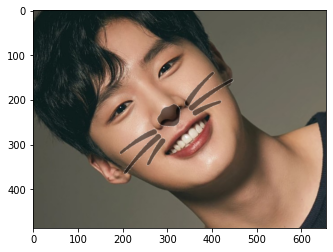

In [168]:
caticker('face1_45.jpg')

In [169]:
caticker('face1_90.jpg')

UnboundLocalError: ignored

얼굴이 일정 각도 이상 회전할 경우 얼굴 인식에 실패하는 현상이 발생한다.

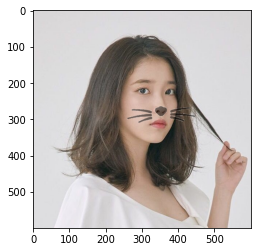

In [170]:
caticker('face2.jpg')

얼굴이 약간 옆으로 돌아간 여성 사진의 경우 잘 인식하고 있다.

In [172]:
caticker('face1_close.jpg')

ValueError: ignored

얼굴 쪽으로 매우 확대하여 편집한 사진을 가져오자 스티커영역이 너무 커져서 잘 작동하지 않고 있다.

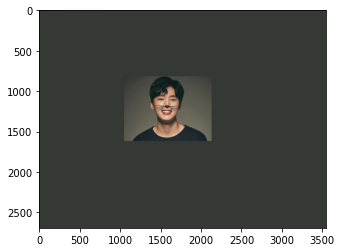

In [176]:
caticker('face1_far.jpg')

반대로 인물은 그대로 두고 사진의 크기만 늘린 경우에는 잘 작동하고 있다.

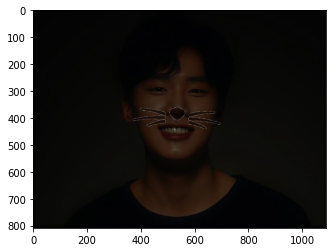

In [174]:
caticker('face1_dark.jpg')

매우 어두운 환경에서도 얼굴 인식에 성공했다.

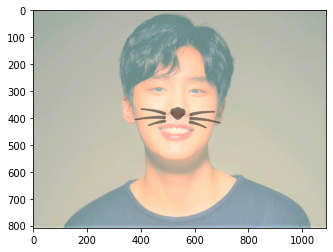

In [175]:
caticker('face1_light.jpg')

반대로 매우 밟은 환경에서도 얼굴 인식에 성공하는 것을 확인할 수 있었다.

In [173]:
caticker('cat.jpg')

UnboundLocalError: ignored

사람이 아닌 고양이의 얼굴을 사용하자 얼굴 인식에 실패했다.

# 회고

이번에는 인물 사진에서 사람의 얼굴을 인식하고 그 위에 스티커를 씌우는 작업을 했다. 여기서 가장 중요한 것은 인물 사진과 사용할 스티커 이미지를 준비한 뒤, 사진에서 사람의 얼굴을 인식하고 랜드마크를 찍는 일이었다. 랜드마크만 잘 찍히면 나머지는 그 위에 적당히 스티커를 붙이면 되기 때문이다. 남은 것은 함수로 불투명도를 조절하고 랜드마크를 사용해 각도를 조절하는 것 뿐이었다.

따라서 다양한 조건 하에서 얼굴인식이 잘 되는지 시험해보았다. 우선 처음 사용한 것이 남자의 정면 사진이었으므로 약간 고개를 돌린 여성 사진을 써보았는데 이 경우 문제 없이 잘 적용되었다. 성별에 관계없이 얼굴의 특징들을 잡아내면 조금 고개를 돌린 것은 괜찮았다. 그러나 사진이 회전하는 경우 문제가 발생했다. 45도 회전은 괜찮았지만 90도가 되자 인식하지 못 했다. 사진이 너무 돌아가면 얼굴 부위들을 잡아내지 못 하는 것으로 보인다.

그리고 인물이 사진에서 차지하는 크기로도 시험해보았다. 이 때 인물이 작은 경우, 사진으로 치면 인물을 멀리서 찍은 경우인데 어느 정도는 괜찮아보였다. 그러나 반대로 가까이서 촬영한 것처럼 인물이 크면 얼굴인식은 괜찮지만 스티커 영역이 사진 전체 크기만큼 커지면서 스티커의 적용에 문제가 발생했다.

사진의 밝기 또한 조절해보았다. 밝기에 좀 문제가 있더라도 얼굴만 인식할 수 있는 정도라면 역시 문제 없이 작동했다. 다만 얼굴이 보이지 않을 정도라면 어쩔 수 없겠으나 이 경우엔 애초에 인식해야할 것이 사진에 존재하지 않는 것과 마찬가지이므로 사진을 다시 가져와야할 것이다.

인물의 회전에 따른 인식 문제는 사진을 90도 씩 회전시키면 해결할 수 있을 것으로 보인다. 45도까지는 무리 없이 작동하므로, 얼굴 인식에 실패하면 성공할 때까지 (최대 3회) 90도 회전시키고, 인식에 성공하면 돌린 만큼 다시 복구하는 것이다. 우리에게 필요한 것은 랜드마크이므로 이것만 성공하면 그 이후엔 스티커 함수가 잘 작동할 것이다.

인물의 크기의 경우 너무 가까울 때, 얼굴인식은 잘 되었으므로 사진 주변에 임의의 공간을 패딩하듯 붙이고 스티커를 적용한 다음 붙인 공간을 제거하는 것으로 해결할 수 있을 것이다. 이렇게 하면 결과적으로 내가 인물의 크기를 사진에 비해 작게할 때와 거의 유사한 상태가 되므로 역시 스티커 함수의 작동문제가 해결될 것이다.

마지막으로 사람의 사진이 아닌 동물의 사진을 사용했었다. 고양이 사진을 스티커 함수에 적용하자 얼굴 인식에 실패했다. 만들고자 하는 것은 사람의 얼굴을 인식하는 어플이므로 동물의 얼굴에 작동한다면 그것은 오작동으로 볼 수 있다. 따라서 사람이 아닌 것에 반응하지 않고 사람에게만 반응하는 것은 잘 동작한다고 말할 수 있다.

마지막으로 조금 아쉬웠던 것은 스티커를 얼굴에 맞춰서 회전시킬 때 아주 약간 틀어진 것 같다는 인상이 든다는 것이었는데 이를 해결하기 위해 원래와는 다른 다양한 벡터를 사용해보는 일도 고려했으나 그렇게 하지는 않았다. 왜냐하면 얼굴 인식에 사용되는 사진이 다양한 환경에서 촬영될 수 있기 때문인데 눈썹이나 턱 등은 충분히 가려질 수 있다고 생각했다. 즉 그런 것들과 관계없이 얼굴이 찍힌다면 가려질 확률이 가장 적은 미간과 코 끝을 사용해 스티커를 회전시키기로 결정했다.

실행속도는 그리 느리지 않았지만 실제로 매우 빠를 필요는 없다. 문제가 될 정도로 느린 것만 아니라면 충분하다. 하지만 스티커의 위치가 정확하게 자리 잡을 필요는 있다. 이번 경우에서 스티커는 사진 아무 곳에나 자리하는 것이 아니라 얼굴의 일부와 상호작용하는 것이므로 코에 자리해야할 스티커가 다른 위치에 놓인다면 매우 어색한 사진이 될 것이다.

# Reference

https://deep-learning-study.tistory.com/115 OpenCV 연산에 대해

https://yunwoong.tistory.com/125 OpenCV 회전에 대해